# Descriptive and plots HumanA
author: Nora Maleki (noora.maleki@gmail.com)
April 2022

## Import libraries

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [225]:
colorblind_palette = ['#2d004b', '#5ab4ac', '#b2182b', '#8c510a','#4575b4','#8073ac']
sns.set_theme(font_scale=1, palette=colorblind_palette, style='darkgrid')

## Load data

In [226]:
FILE_PATH = r'../../data/01_main'
PLOT_PATH = f'{FILE_PATH}/plots/descriptive/'
PLOT_PATH_BUILDING = f'{FILE_PATH}/plots/descriptive/buildings_subjects/'

os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)
os.makedirs(os.path.dirname(PLOT_PATH_BUILDING), exist_ok=True)

In [227]:
df_cleaned = pd.read_csv(f'{FILE_PATH}/07_preprocessed.csv')
df_cleaned.head()

,subject_id,body_pos_x,body_pos_z,pointer_pos_x,pointer_pos_z,pointer_dir_x,pointer_dir_z,building_center_z,building_center_x,avatar_presence,...,moved_target_position_z,target_to_x_180,dir_to_x_180,target_to_x_360,dir_to_x_360,final_180_angles,final_360_angles,rounded_180_angles,rounded_360_angles,absolute_180_angles
0,365,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,0.989548,53.288437,-72.578285,True,...,193.285812,77.811048,93.207763,77.811048,93.207763,15.396716,15.396716,15.0,15.0,15.396716
1,365,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,0.992235,53.288437,-72.578285,True,...,213.233536,91.855810,85.818077,91.855810,85.818077,-6.037733,353.962267,-6.0,354.0,6.037733
2,365,38.849380,53.547638,38.471634,53.516281,-0.993265,-0.112792,53.288437,-72.578285,True,...,-0.259201,-179.866720,-173.521430,180.133280,186.478570,6.345290,6.345290,6.0,6.0,6.345290
3,365,38.880081,53.564148,38.700195,53.581047,-0.995648,-0.065598,53.288437,-72.578285,True,...,-0.275711,-179.858270,-176.230517,180.141730,183.769483,3.627752,3.627752,4.0,4.0,3.627752
4,365,110.754181,196.522675,110.428146,196.550751,-0.941145,-0.321944,53.288437,-72.578285,True,...,-143.234238,-142.000152,-161.115388,217.999848,198.884612,-19.115237,340.884763,-19.0,341.0,19.115237


In [228]:
N = df_cleaned.subject_id.nunique()
N

16

## Starting locations

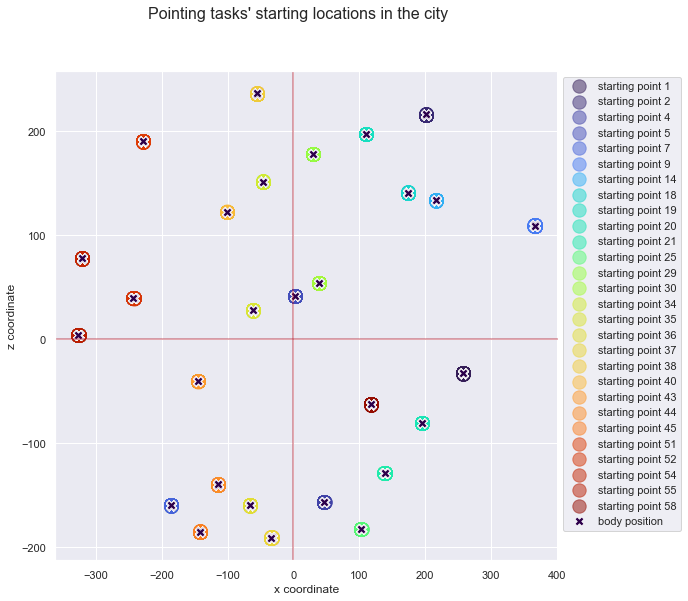

In [231]:
_, ax = plt.subplots(figsize=(9,9))

for i in df_cleaned.starting_loc_id.sort_values().unique():
    ax.scatter(df_cleaned[['body_pos_x']][df_cleaned.starting_loc_id==i],
               df_cleaned[['body_pos_z']][df_cleaned.starting_loc_id==i],
               label=f'starting point {i}',
               color=plt.cm.turbo(i/60),
               s=180,
               alpha=.5)

sns.scatterplot(
    data=df_cleaned,
    x='body_pos_x',
    y='body_pos_z',
    s=80,
    marker='X',
    label='body position'
).set(xlabel='x coordinate', ylabel='z coordinate')


plt.suptitle(t="Pointing tasks' starting locations in the city", size=16)
plt.axvline(x=0, color=colorblind_palette[2], alpha=.5)
plt.axhline(y=0, color=colorblind_palette[2], alpha=.5)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig(f'{PLOT_PATH}/starting_locations_kmeans_body.png', bbox_inches='tight', dpi=90)

plt.show()

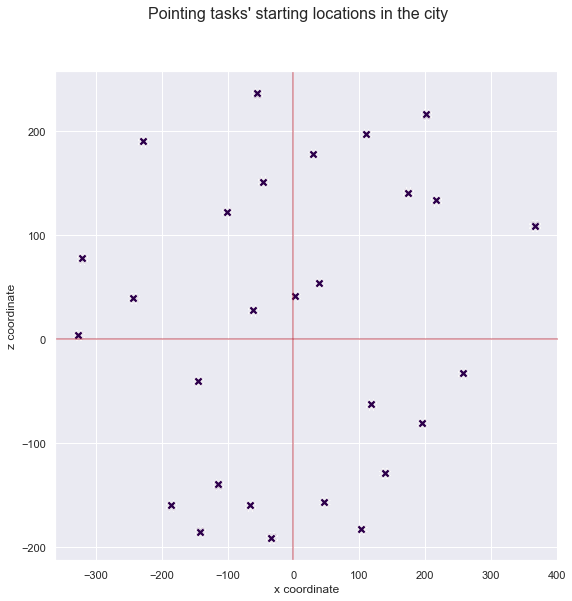

In [232]:
_, _ = plt.subplots(figsize=(9,9))

sns.scatterplot(
    data=df_cleaned,
    x='body_pos_x',
    y='body_pos_z',
    s=80,
    marker='X'
).set(xlabel='x coordinate', ylabel='z coordinate')


plt.suptitle(t="Pointing tasks' starting locations in the city", size=16)
plt.axvline(x=0, color=colorblind_palette[2], alpha=.5)
plt.axhline(y=0, color=colorblind_palette[2], alpha=.5)

plt.savefig(f'{PLOT_PATH}/starting_locations.png', bbox_inches='tight', dpi=90)

plt.show()

## Angular difference from the target building and Reaction times

#### Summary statistics of the angular deviations and reaction times

In [233]:
df_cleaned[['final_360_angles', 'final_180_angles', 'RT']].describe()

,final_360_angles,final_180_angles,RT
count,5359.000000,5359.000000,5359.000000
mean,195.285547,-4.363641,7.751931
std,135.192313,68.464680,5.800104
min,0.034764,-179.881808,0.955793
25%,47.564940,-43.681602,3.422897
50%,241.968709,-5.301192,5.883961
75%,327.139052,31.826478,10.140676
max,359.983459,179.983386,29.206128


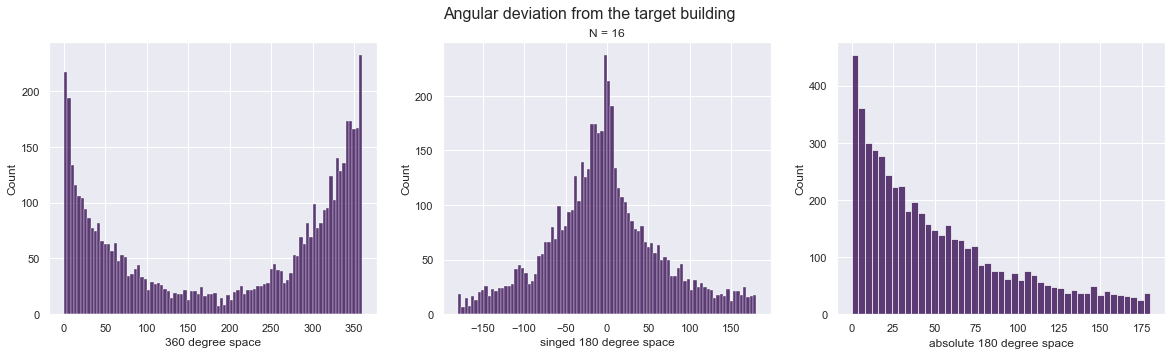

In [234]:
_, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(
    data=df_cleaned,
    x='final_360_angles',
    binwidth=4,
    ax=axes[0]
).set(xlabel='360 degree space')

sns.histplot(
    data=df_cleaned,
    x='final_180_angles',
    binwidth=4,
    ax=axes[1]
).set(xlabel='singed 180 degree space', title=f'N = {N}')

sns.histplot(
    data=df_cleaned,
    x='absolute_180_angles',
    binwidth=4,
    ax=axes[2]
).set(xlabel='absolute 180 degree space')

plt.suptitle('Angular deviation from the target building', size=16)
plt.savefig(f'{PLOT_PATH}/angular_diff_dist.png', bbox_inches='tight', dpi=90)

plt.show()

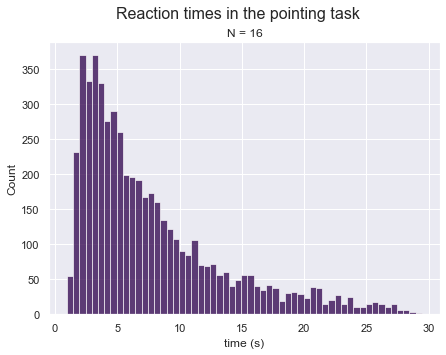

In [235]:
_, _ = plt.subplots(figsize=(7,5))

sns.histplot(
    data=df_cleaned,
    x='RT',
    binwidth=.5
).set(xlabel='time (s)', title=f'N = {N}')

plt.suptitle('Reaction times in the pointing task', size=16)
plt.savefig(f'{PLOT_PATH}/RT_dist.png', bbox_inches='tight', dpi=90)

plt.show()

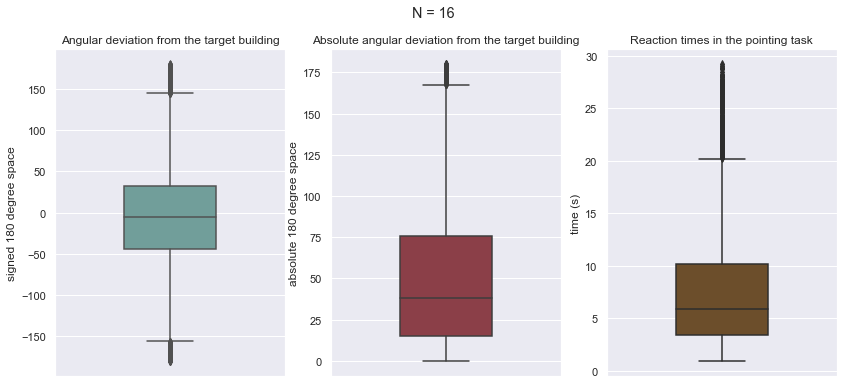

In [236]:
_, axes = plt.subplots(1, 3, figsize=(14,6))

sns.boxplot(
    data=df_cleaned,
    y='final_180_angles',
    orient='v',
    width=.4,
    saturation=.5,
    color=colorblind_palette[1],
    ax=axes[0]
).set(ylabel='signed 180 degree space', title='Angular deviation from the target building')

sns.boxplot(
    data=df_cleaned,
    y='absolute_180_angles',
    orient='v',
    width=.4,
    saturation=.5,
    color=colorblind_palette[2],
    ax=axes[1]
).set(ylabel='absolute 180 degree space', title='Absolute angular deviation from the target building')

sns.boxplot(
    data=df_cleaned,
    y='RT',
    orient='v',
    color=colorblind_palette[3],
    width=.4,
    saturation=.5,
    ax=axes[2]
).set(ylabel='time (s)', title='Reaction times in the pointing task')

plt.suptitle(t=f'N = {N}')
plt.savefig(f'{PLOT_PATH}/angular_diff_RT_box_plot.png', bbox_inches='tight', dpi=90)

plt.show()

#### Per subject

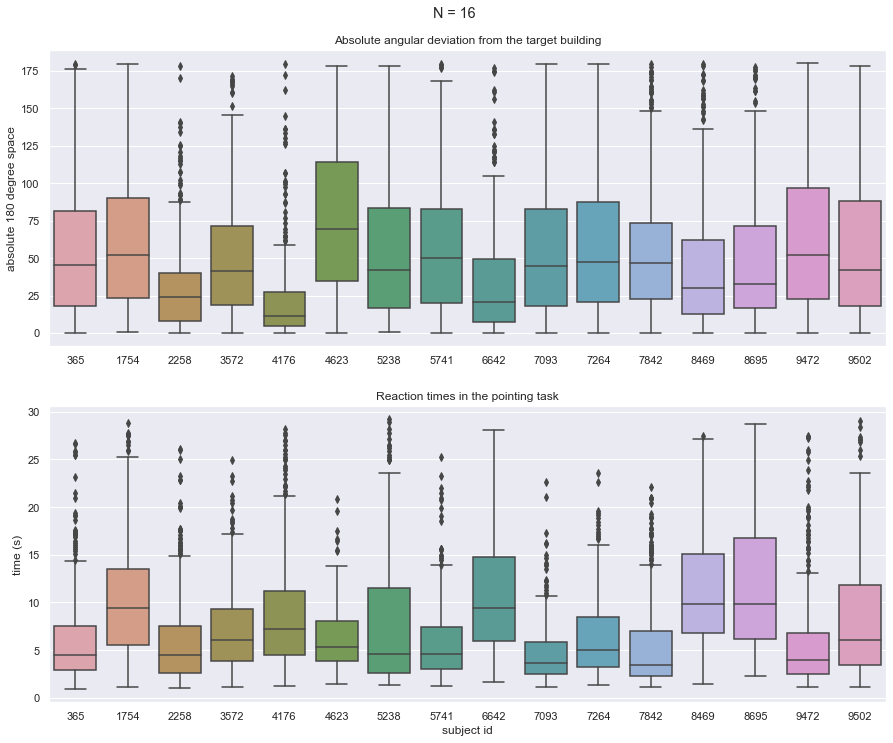

In [237]:
_, axes = plt.subplots(2, 1, figsize=(15,12))

sns.boxplot(
    data=df_cleaned,
    x='subject_id',
    y='absolute_180_angles',
    orient='v',
    saturation=.5,
    ax=axes[0]
).set(ylabel='absolute 180 degree space', xlabel='', title='Absolute angular deviation from the target building')


sns.boxplot(
    data=df_cleaned,
    x='subject_id',
    y='RT',
    orient='v',
    saturation=.5,
    ax=axes[1]
).set(xlabel='subject id', ylabel='time (s)', title='Reaction times in the pointing task')

plt.suptitle(t=f'N = {N}', y=.93)
plt.savefig(f'{PLOT_PATH}/angle_RT_by_subject.png', bbox_inches='tight', dpi=90)

plt.show()

                            absolute angular deviation  reaction times
absolute angular deviation                    1.000000        0.016779
reaction times                                0.016779        1.000000


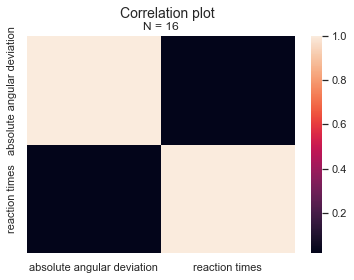

In [238]:
corr_df = df_cleaned[['absolute_180_angles', 'RT']].rename(columns={'absolute_180_angles':'absolute angular deviation', 'RT':'reaction times'}).corr()

print(corr_df)

sns.heatmap(corr_df).set(title=f'N = {N}')
plt.suptitle(t='Correlation plot', size=14, x=0.45)
plt.savefig(f'{PLOT_PATH}/angle_RT_correlation.png', bbox_inches='tight', dpi=90)

plt.show()

#### Per starting location

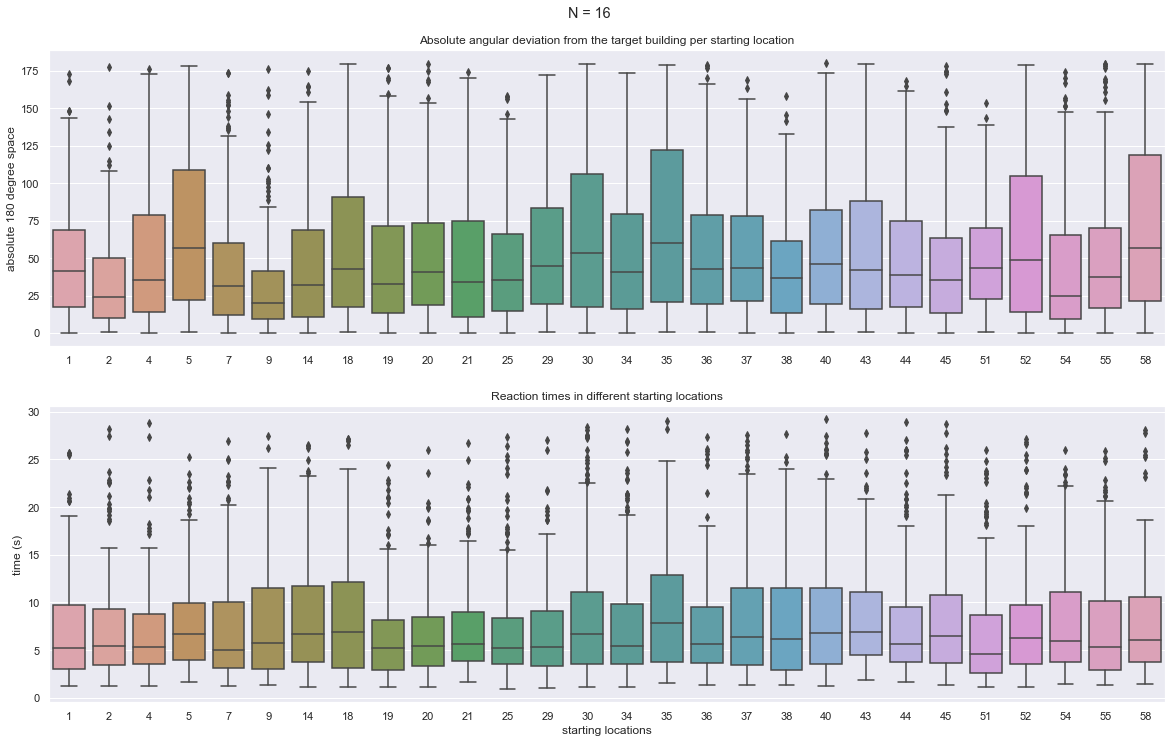

In [240]:
_, axes = plt.subplots(2, 1, figsize=(20,12))
df = df_cleaned.sort_values('starting_loc_id')

sns.boxplot(
    data=df,
    x='starting_loc_id',
    y='absolute_180_angles',
    orient='v',
    saturation=.5,
    ax=axes[0]
).set(ylabel='absolute 180 degree space', xlabel='', title='Absolute angular deviation from the target building per starting location')

sns.boxplot(
    data=df,
    x='starting_loc_id',
    y='RT',
    orient='v',
    saturation=.5,
    ax=axes[1]
).set(xlabel='starting locations', ylabel='time (s)', title='Reaction times in different starting locations')

plt.suptitle(t=f'N = {N}', y=.93)
plt.savefig(f'{PLOT_PATH}/angle_RT_starting_locations.png', bbox_inches='tight', dpi=90)

plt.show()

#### Per building

Angular deviation

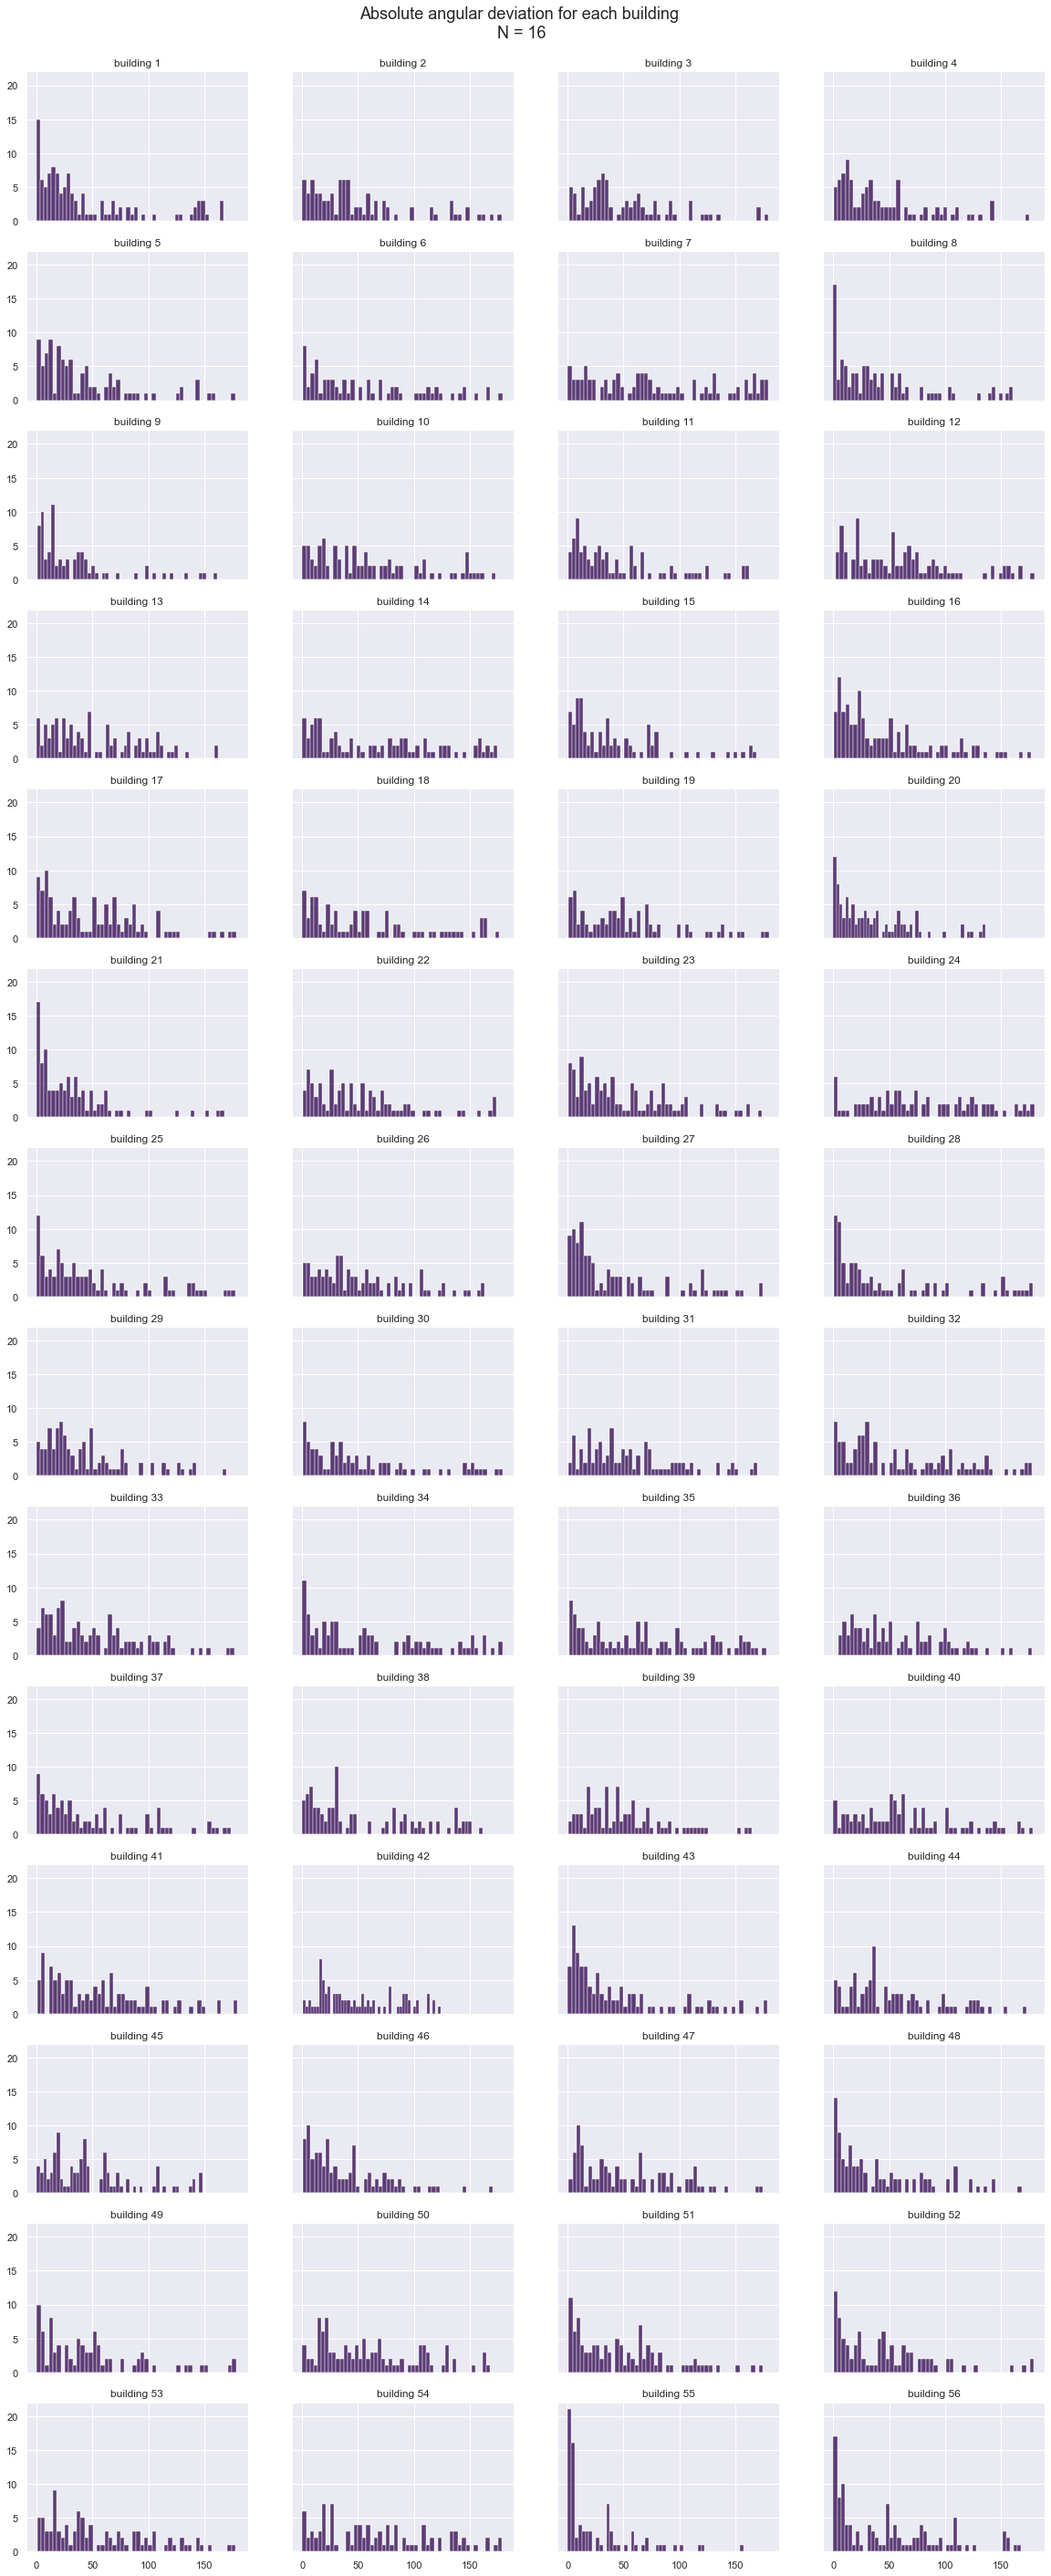

In [241]:
n_col = 4
n_row = 14

fig, axes = plt.subplots(n_row, n_col, sharex=True, sharey=True, figsize=(20,50))
plt.subplots_adjust(hspace=0.2)

for i, aid in enumerate(df_cleaned.avatar_id.sort_values().unique()):
    df = df_cleaned[['avatar_id', 'absolute_180_angles']].query('avatar_id==@aid')
    ax = axes[i//n_col, i%n_col]
    sns.histplot(
        data=df,
        x='absolute_180_angles',
        bins=50,
        ax=ax
    ).set(
        title=f'building {aid}',
        xlabel='',
        ylabel=''
    )

plt.suptitle(t=f'Absolute angular deviation for each building\n N = {N}', size=18, y=.9)

plt.savefig(f'{PLOT_PATH}/angle_building_hist.png', bbox_inches='tight', dpi=90)

plt.show()

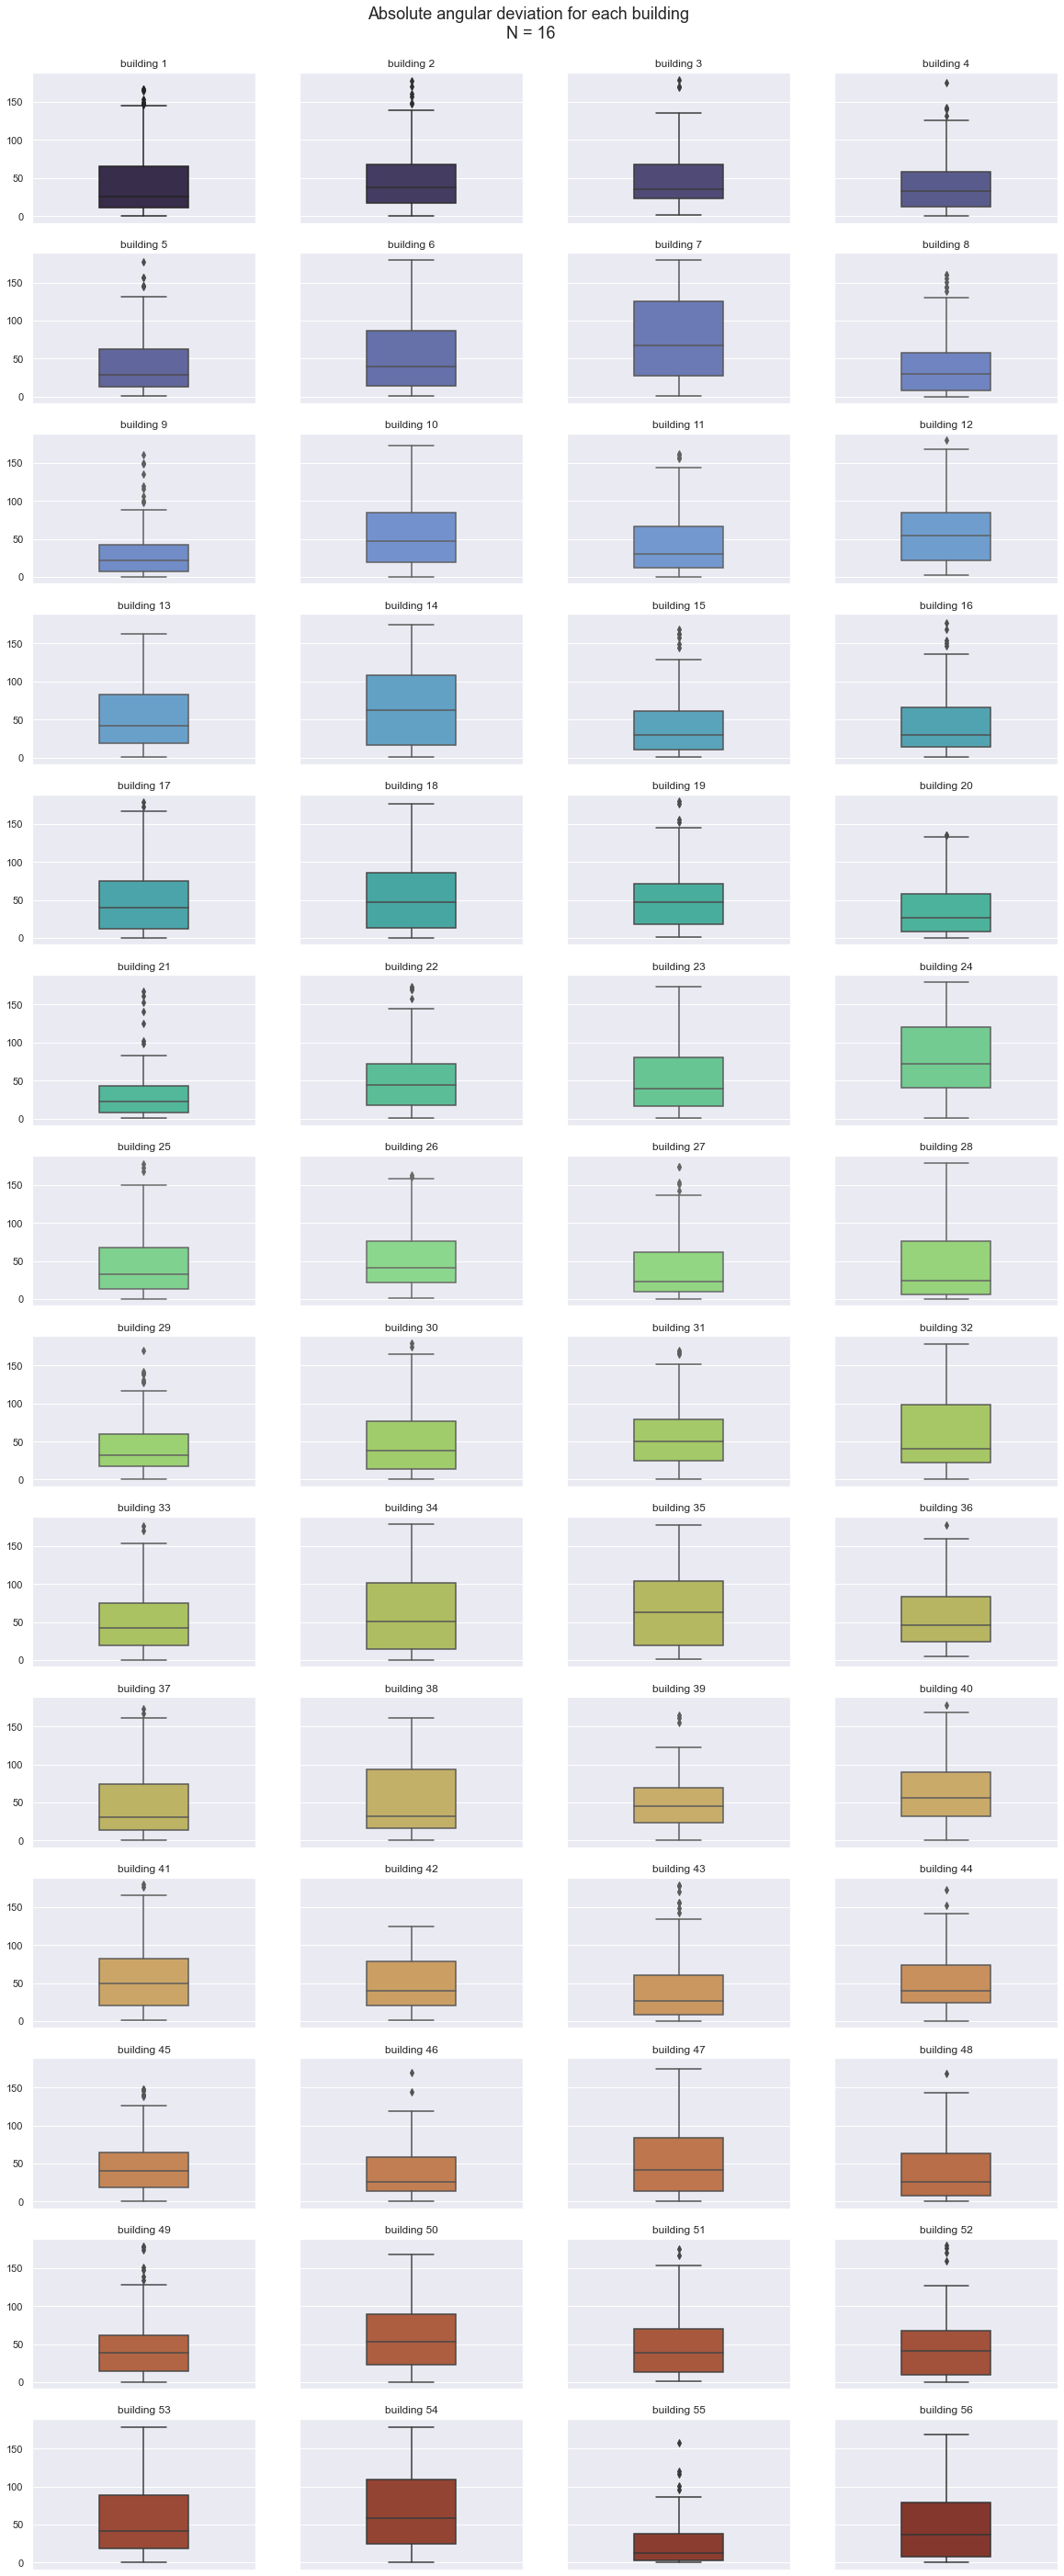

In [242]:
n_col = 4
n_row = 14

fig, axes = plt.subplots(n_row, n_col, sharex=True, sharey=True, figsize=(20,50))
plt.subplots_adjust(hspace=0.2)

for i, aid in enumerate(df_cleaned.avatar_id.sort_values().unique()):
    df = df_cleaned[['avatar_id', 'absolute_180_angles']].query('avatar_id==@aid')
    ax = axes[i//n_col, i%n_col]
    sns.boxplot(
        data=df,
        y='absolute_180_angles',
        orient='v',
        color=plt.cm.turbo(aid / 60),
        width=.4,
        saturation=.5,
        ax=ax
    ).set(
        title=f'building {aid}',
        xlabel='',
        ylabel=''
    )

plt.suptitle(t=f'Absolute angular deviation for each building\n N = {N}', size=18, y=.9)

plt.savefig(f'{PLOT_PATH}/angle_building_box.png', bbox_inches='tight', dpi=90)

plt.show()

#### Per subject for each building

In [243]:
for aid in df_cleaned.avatar_id.sort_values().unique():

    _, axes = plt.subplots(2, 1, figsize=(15,12))
    df = df_cleaned.query('avatar_id==@aid')


    sns.boxplot(
        data=df,
        x='subject_id',
        y='absolute_180_angles',
        orient='v',
        saturation=.5,
        ax=axes[0]
    ).set(ylabel='absolute 180 degree space', xlabel='', title='Absolute angular deviation from the target building')


    sns.boxplot(
        data=df,
        x='subject_id',
        y='RT',
        orient='v',
        saturation=.5,
        ax=axes[1]
    ).set(xlabel='subject id', ylabel='time (s)', title='Reaction times in the pointing task')

    plt.suptitle(t=f'Building {aid}', size=18, y=.92)
    plt.savefig(f'{PLOT_PATH_BUILDING}/building_{aid}_angle_RT_by_subject.png', bbox_inches='tight', dpi=90)
    plt.close()
    del df

### Frequency and proportion of the angles

In [244]:
tmpdf = pd.DataFrame({
    'angles' : df_cleaned.rounded_360_angles.sort_values().unique(),
    'frequency' : df_cleaned.rounded_360_angles.value_counts().sort_index().values
})

tmpdf['proportion'] = tmpdf.frequency / len(df_cleaned)

tmpdf.to_csv(f'{FILE_PATH}/08_angle_frequency_proportion.csv', index=False)
del tmpdf

In [245]:
freq_df = pd.read_csv(f'{FILE_PATH}/08_angle_frequency_proportion.csv')
freq_df.head()

,angles,frequency,proportion
0,0.0,43,0.008024
1,1.0,54,0.010077
2,2.0,47,0.008770
3,3.0,51,0.009517
4,4.0,44,0.008210


In [246]:
freq_df.describe()

,angles,frequency,proportion
count,361.000000,361.000000,361.000000
mean,180.000000,14.844875,0.002770
std,104.355961,12.807692,0.002390
min,0.000000,1.000000,0.000187
25%,90.000000,5.000000,0.000933
50%,180.000000,10.000000,0.001866
75%,270.000000,21.000000,0.003919
max,360.000000,63.000000,0.011756


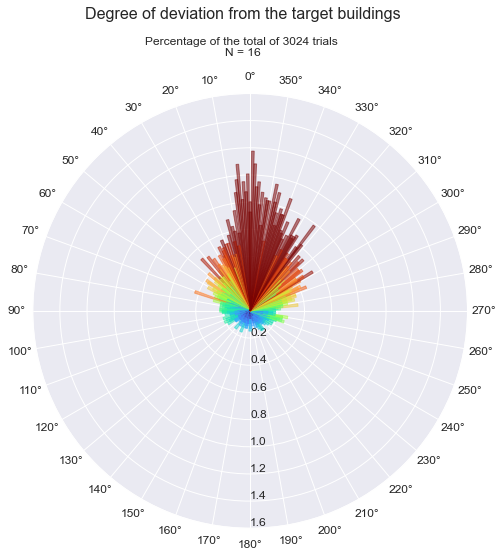

In [247]:
theta = np.deg2rad(freq_df.angles)
radii = freq_df.proportion
width = np.pi / (3*freq_df.frequency)

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection='polar'))

colors = plt.cm.turbo(freq_df.frequency / 30)

ax.bar(theta, radii, width=width, color=colors, edgecolor=colors, bottom=0, alpha=0.5)

ax.set_rmax(0.016)
ax.set_theta_zero_location('N')
ax.set_rlabel_position(180)
ax.tick_params(labelsize=12)
ax.set_thetagrids(range(0, 360, 10))
ax.set_yticks(ax.get_yticks())

labels = [round(x*100, 1) for x in ax.get_yticks()]
ax.set_yticklabels(labels=labels)

plt.suptitle('Degree of deviation from the target buildings', size=16, y=1.03)
fig.text(0.5, 0.96, f'Percentage of the total of 3024 trials \nN = {N}', ha='center', va='center', size=12)

plt.savefig(f'{PLOT_PATH}/deviation_degree_all.png', bbox_inches='tight', dpi=90)

plt.show()

### Angular difference to target by Factors `avatar presence` and  `context meaningfulness`

In [248]:
prop_dict = dict(freq_df[['frequency', 'proportion']].values)

tmpdf = (df_cleaned
         .groupby(['avatar_presence', 'meaningful', 'rounded_360_angles'])
         .rounded_360_angles
         .count()
         .reset_index(level=[0,1])
         .rename(columns={'rounded_360_angles' : 'frequency'})
         .reset_index()
         .rename(columns={'rounded_360_angles' : 'angles'})
         )
tmpdf['proportion'] = tmpdf.frequency.map(prop_dict)
tmpdf['theta'] = np.deg2rad(tmpdf.angles)

tmpdf.to_csv(f'{FILE_PATH}/09_factors_angle_frequency.csv', index=False)
del tmpdf

In [249]:
factors_df = pd.read_csv(f'{FILE_PATH}/09_factors_angle_frequency.csv')
factors_df.head()

,angles,avatar_presence,meaningful,frequency,proportion,theta
0,0.0,False,False,12,0.002239,0.000000
1,1.0,False,False,20,0.003732,0.017453
2,2.0,False,False,10,0.001866,0.034907
3,3.0,False,False,12,0.002239,0.052360
4,4.0,False,False,9,0.001679,0.069813


In [250]:
factors_df.describe()

,angles,frequency,proportion,theta
count,1222.000000,1222.000000,1222.000000,1222.000000
mean,180.640753,4.385434,0.000818,3.152776
std,110.967199,3.913213,0.000730,1.936743
min,0.000000,1.000000,0.000187,0.000000
25%,78.000000,2.000000,0.000373,1.361357
50%,181.000000,3.000000,0.000560,3.159046
75%,282.750000,6.000000,0.001120,4.934918
max,360.000000,26.000000,0.004852,6.283185


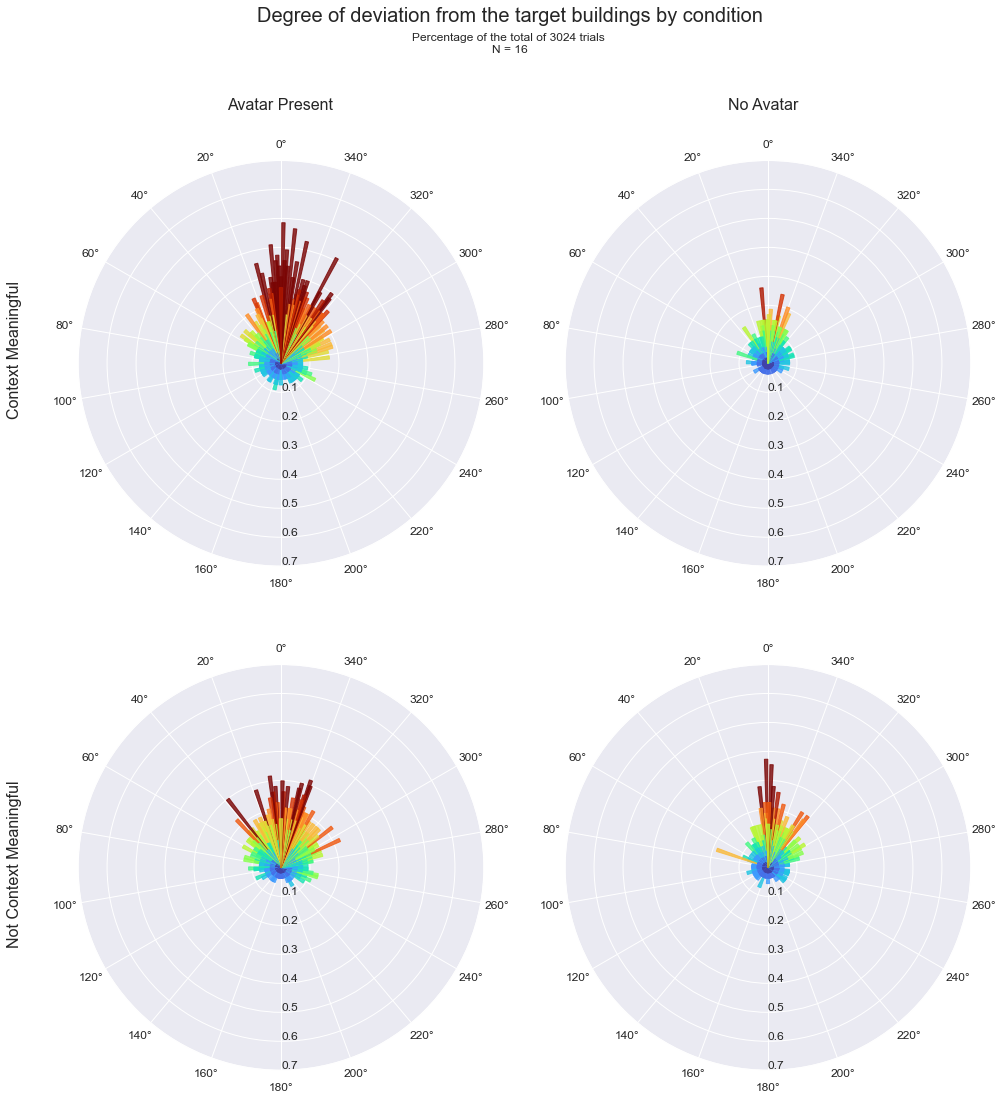

In [251]:
fig, axes = plt.subplots(2, 2, figsize=(16,17), subplot_kw=dict(projection='polar'))
s, y = 14, 1.08

df1 = factors_df.query('meaningful==True & avatar_presence==True')
df2 = factors_df.query('meaningful==True & avatar_presence==False')
df3 = factors_df.query('meaningful==False & avatar_presence==True')
df4 = factors_df.query('meaningful==False & avatar_presence==False')

dfs = [df1, df2, df3, df4]

for i, df in enumerate(dfs):
    theta = df.theta
    radii = df.proportion
    width = np.pi / (5*df.frequency)
    colors = plt.cm.turbo(df.frequency / 15)

    ax = axes.flatten()[i]

    ax.bar(theta, radii, width=width, color=colors, edgecolor=colors, bottom=0, alpha=0.8)

    ax.set_rmax(0.007)
    ax.set_theta_zero_location('N')
    ax.set_rlabel_position(180)
    ax.tick_params(labelsize=12)
    ax.set_thetagrids(range(0, 360, 20))
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(labels=[round(x*100, 1) for x in ax.get_yticks()])

fig.text(0.3, 0.92, 'Avatar Present', ha='center', va='center', size=16)
fig.text(0.72, 0.92, 'No Avatar', ha='center', va='center', size=16)
fig.text(0.07, 0.72, 'Context Meaningful', ha='center', va='center', rotation='vertical', size=16)
fig.text(0.07, 0.3, 'Not Context Meaningful', ha='center', va='center', rotation='vertical', size=16)
fig.text(0.5, 0.97, f'Percentage of the total of 3024 trials \nN = {N}', ha='center', va='center', size=12)

plt.suptitle('Degree of deviation from the target buildings by condition', size=20, y=1)
plt.savefig(f'{PLOT_PATH}/03_conditions_deviation_degree.png', bbox_inches='tight', dpi=90)

plt.show()

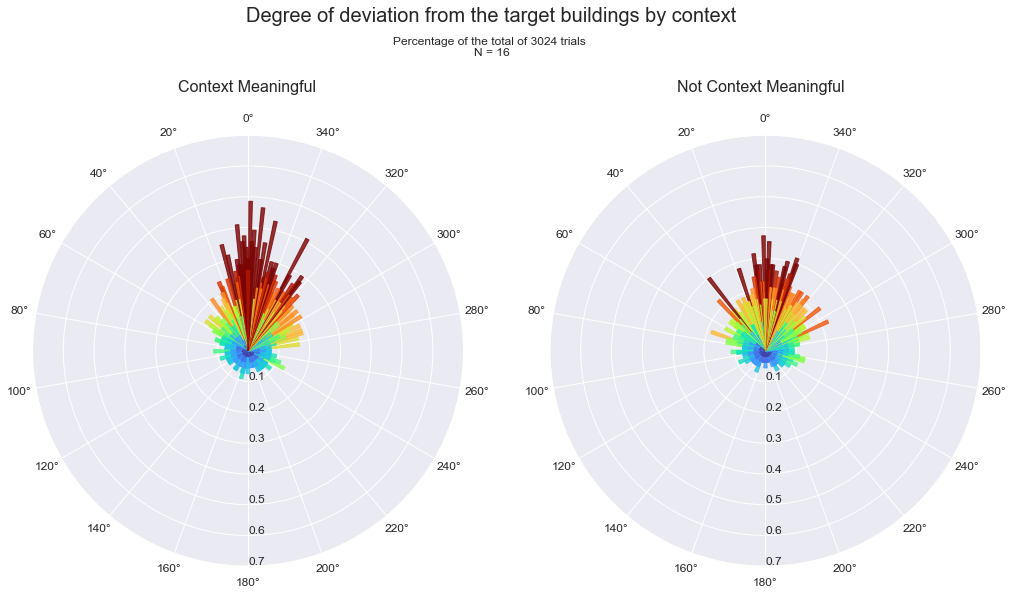

In [252]:
fig, axes = plt.subplots(1, 2, figsize=(17,8), subplot_kw=dict(projection='polar'))
s, y = 14, 1.08

df1 = factors_df.query('meaningful==True')
df2 = factors_df.query('meaningful==False')

dfs = [df1, df2]

for i, df in enumerate(dfs):
    theta = df.theta
    radii = df.proportion
    width = np.pi / (5*df.frequency)
    colors = plt.cm.turbo(df.frequency / 15)

    ax = axes.flatten()[i]

    ax.bar(theta, radii, width=width, color=colors, edgecolor=colors, bottom=0, alpha=0.8)

    ax.set_rmax(0.007)
    ax.set_theta_zero_location('N')
    ax.set_rlabel_position(-180)
    ax.tick_params(labelsize=12)
    ax.set_thetagrids(range(0, 360, 20))
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(labels=[round(x*100, 1) for x in ax.get_yticks()])

fig.text(0.3, 0.96, 'Context Meaningful', ha='center', va='center', size=16)
fig.text(0.72, 0.96, 'Not Context Meaningful', ha='center', va='center', size=16)
fig.text(0.5, 1.03, f'Percentage of the total of 3024 trials \nN = {N}', ha='center', va='center', size=12)

plt.suptitle('Degree of deviation from the target buildings by context', size=20, y=1.1)
plt.savefig(f'{PLOT_PATH}/04_by_context_deviation_degree.png', bbox_inches='tight', dpi=90)

plt.show()

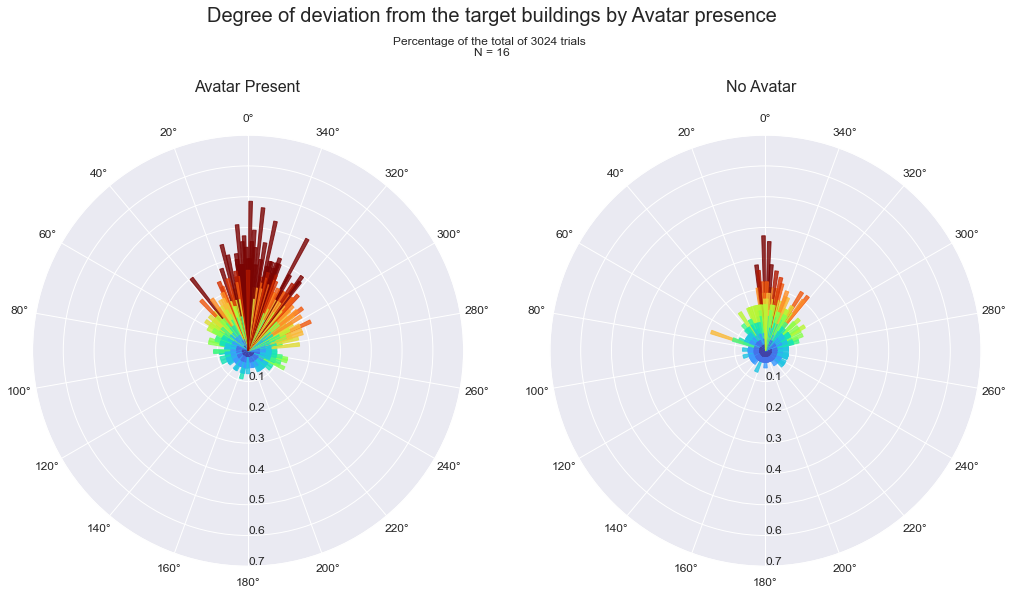

In [253]:
fig, axes = plt.subplots(1, 2, figsize=(17,8), subplot_kw=dict(projection='polar'))
s, y = 14, 1.08

df1 = factors_df.query('avatar_presence==True')
df2 = factors_df.query('avatar_presence==False')

dfs = [df1, df2]

for i, df in enumerate(dfs):
    theta = df.theta
    radii = df.proportion
    width = np.pi / (5*df.frequency)
    colors = plt.cm.turbo(df.frequency / 15)

    ax = axes.flatten()[i]

    ax.bar(theta, radii, width=width, color=colors, edgecolor=colors, bottom=0, alpha=0.8)

    ax.set_rmax(0.007)
    ax.set_theta_zero_location('N')
    ax.set_rlabel_position(-180)
    ax.tick_params(labelsize=12)
    ax.set_thetagrids(range(0, 360, 20))
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(labels=[round(x*100, 1) for x in ax.get_yticks()])

fig.text(0.3, 0.96, 'Avatar Present', ha='center', va='center', size=16)
fig.text(0.72, 0.96, 'No Avatar', ha='center', va='center', size=16)
fig.text(0.5, 1.03, f'Percentage of the total of 3024 trials \nN = {N}', ha='center', va='center', size=12)

plt.suptitle('Degree of deviation from the target buildings by Avatar presence', size=20, y=1.1)
plt.savefig(f'{PLOT_PATH}/05_by_avatar_presence_deviation_degree.png', bbox_inches='tight', dpi=90)

plt.show()

## Building counts

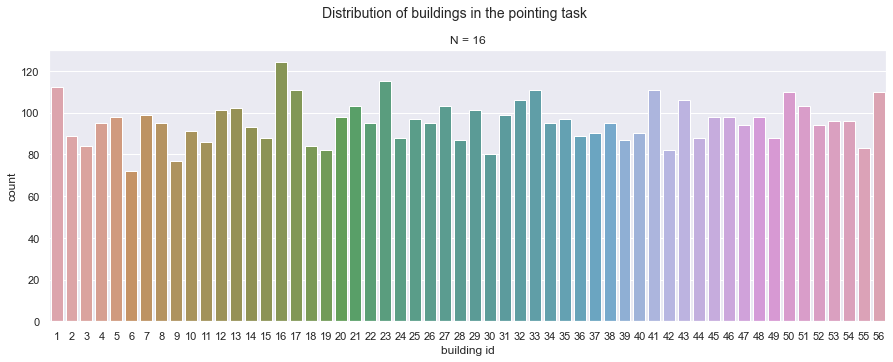

In [255]:
_, axes = plt.subplots(figsize=(15,5))

sns.countplot(
    data=df_cleaned,
    x='avatar_id',
    orient='v',
    saturation=.5
).set(xlabel='building id', title=f'N = {N}')

plt.suptitle(t='Distribution of buildings in the pointing task', size=14, y=1)
plt.savefig(f'{PLOT_PATH}/buildings_distribution.png', bbox_inches='tight', dpi=90)
plt.show()

Per subject

In [256]:
for subj in df_cleaned.subject_id.unique():

    _, axes = plt.subplots(figsize=(15,5))
    df = df_cleaned.query('subject_id==@subj')

    sns.countplot(
        data=df,
        x='avatar_id',
        orient='v',
        saturation=.5
    ).set(xlabel='building id', title=f'Subject {subj}')

    plt.suptitle(t='Distribution of buildings in the pointing task', size=14, y=1)
    plt.savefig(f'{PLOT_PATH_BUILDING}/subject_{subj}_buildings_distribution.png', bbox_inches='tight', dpi=90)
    plt.close()
    del df

Based on meaningfulness and avatar presence

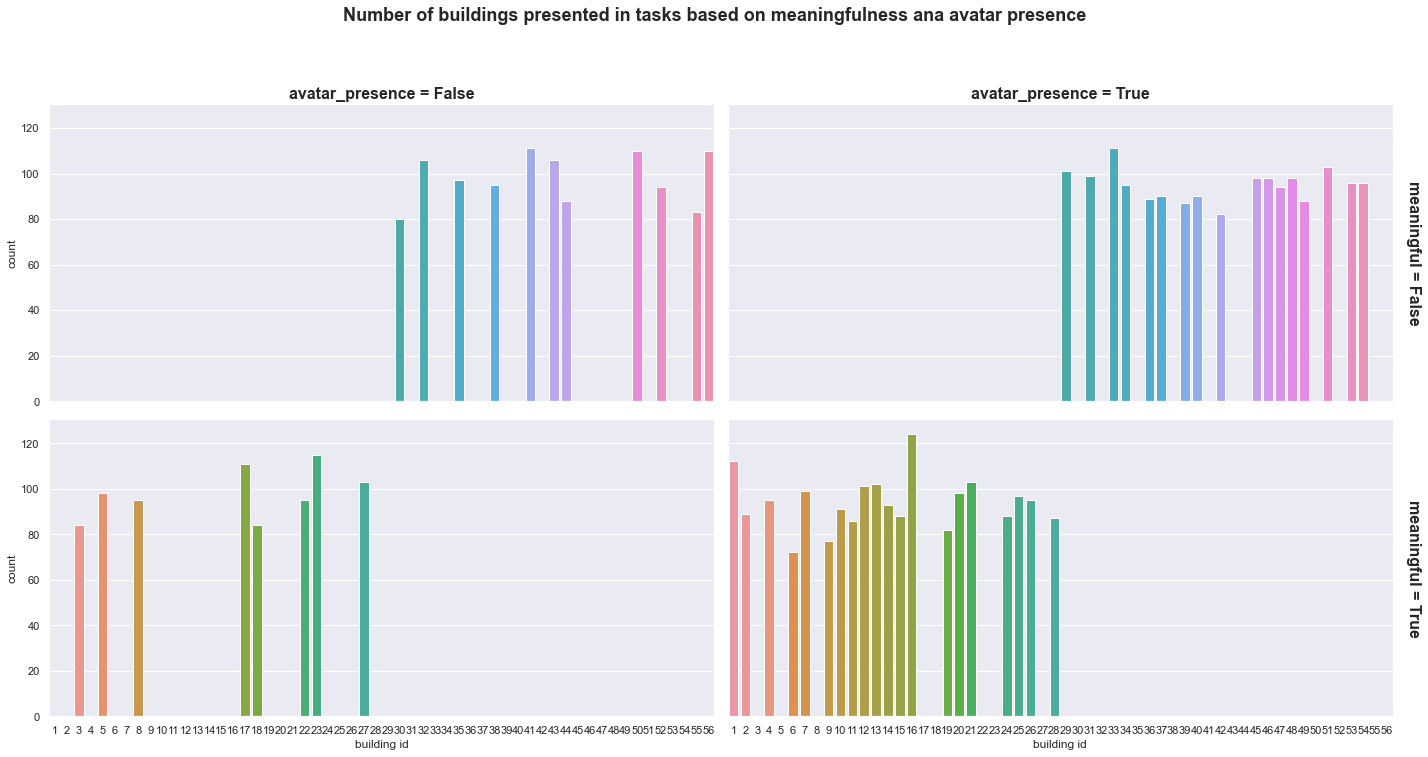

In [273]:
g = sns.catplot(
    data=df_cleaned,
    x='avatar_id',
    col='avatar_presence',
    row='meaningful',
    kind='count',
    aspect=2,
    margin_titles=True
)

plt.suptitle('Number of buildings presented in tasks based on meaningfulness ana avatar presence', fontweight='bold', size=18, y=1.05)
g.set_titles(fontweight='bold', size=16)
g.set_axis_labels('building id')
g.tight_layout()

g.savefig(f'{PLOT_PATH}/buildings_distribution_meaning_avatar.png', bbox_inches='tight', dpi=90)

plt.show()

In [276]:
for subj in df_cleaned.subject_id.unique():
    df = df_cleaned.query('subject_id==@subj')

    g = sns.catplot(
        data=df,
        x='avatar_id',
        col='avatar_presence',
        row='meaningful',
        kind='count',
        aspect=2,
        margin_titles=True
    )

    plt.suptitle(f'Number of buildings presented in tasks based on meaningfulness ana avatar presence\n subject {subj}', fontweight='bold', size=18, y=1.05)
    g.set_titles(fontweight='bold', size=16)
    g.set_axis_labels('building id')
    g.tight_layout()

    g.savefig(f'{PLOT_PATH_BUILDING}/subject_{subj}_buildings_distribution_meaning_avatar.png', bbox_inches='tight', dpi=90)
    plt.close()
    del df